### This is a simple notebook to build and visualize the kNN algorithm.

It accompanies Chapter 2 of the book.

Author: Viviana Acquaviva

In [35]:
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import pandas as pd 

import sklearn

from sklearn.model_selection import train_test_split # we don't use it here, but it's a useful function!

from sklearn.tree import DecisionTreeClassifier # how methods are imported 

from sklearn import metrics # this will give us access to evaluation metrics

from sklearn import neighbors # here comes the method of the day

In [36]:
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rcParams['figure.dpi'] = 300

### Read in data from file

In [37]:
LearningSet = pd.read_csv('HPLearningSet.csv')

LearningSet = LearningSet.drop(LearningSet.columns[0], axis=1) #We want to drop the first column of the file

In [38]:
#By now we know data frames

LearningSet #Visualizes the first 5 rows

,P_NAME,S_MASS,P_PERIOD,P_DISTANCE,P_HABITABLE
0,Kepler-736 b,0.86,3.601472,0.043718,0
1,Kepler-636 b,0.85,16.080661,0.118082,0
2,Kepler-887 c,1.19,7.638460,0.080420,0
3,Kepler-442 b,0.61,112.305300,0.409327,1
4,Kepler-772 b,0.98,12.992073,0.107408,0
5,Teegarden's Star b,0.09,4.910000,0.025200,1
6,K2-116 b,0.69,4.655411,0.048086,0
7,GJ 1061 c,0.12,6.689000,0.035000,1
8,HD 68402 b,1.12,1103.000000,2.180981,0
9,Kepler-1544 b,0.81,168.811170,0.557107,1


### Let's pick the same train/test set we had in the exercise

In [39]:
TrainSet =  LearningSet.iloc[:13,:] #.iloc is used to slice data frames using positional indexes

TestSet = LearningSet.iloc[13:,:]

### We split the train and test sets in features and label

In [40]:
Xtrain = TrainSet.drop(['P_NAME','P_HABITABLE'],axis=1) #This contains stellar mass, period, and distance

Xtest = TestSet.drop(['P_NAME','P_HABITABLE'],axis=1)  #This contains stellar mass, period, and distance

In [41]:
ytrain = TrainSet.P_HABITABLE #This contains the ground truth label, or output

ytest = TestSet.P_HABITABLE #This contains the ground truth  label, or output

### We are now ready to deploy the kNN (k Nearest Neighbor) algorithm.

It's a simple algorithm based on the idea of distance: we look for the k (an integer) objects that are closest to the one we would like to classify, and take the majority vote among the k classes of the k neighbors.

If you are wondering: what is even there to fit?

I had the same question, and found some solace in [this post](https://stats.stackexchange.com/questions/349842/why-do-we-need-to-fit-a-k-nearest-neighbors-classifier).

In [42]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3)

In [43]:
model

KNeighborsClassifier(n_neighbors=3)

# Learning Check-In: 

How would you code increasing neighbors to 5?

<details><summary><b>Click here for the answer!</b></summary>
<p>
   
```
model = neighbors.KNeighborsClassifier(n_neighbors = 5)
```
   
</p>
</details>

### For visualization purposes, let's use only the first two features to build the model.

#### Build model by fitting training set; predict labels for test set

In [44]:
# We can chain the fit/predict process like this, or use the fit_predict method

model.fit(Xtrain.iloc[:,:2],ytrain) #this fits the model, which can then be used to predict stuff

ytestpred = model.predict(Xtest.iloc[:,:2]) #this uses the fitted model to predict the labels from the 5 objects in test set

In [45]:
ytestpred

array([1, 0, 1, 0, 1])

### Learning Check-in
   
Can you predict the labels for the training set? What is the correct code?
 
<details><summary><b>Click here for the answer!</b></summary>
<p>
   
```
ytrainpred = model.predict(Xtrain.iloc[:,:2]
```
   
</p>
</details>
 


In [47]:
ytestpred, ytest.values #compare

(array([1, 0, 1, 0, 1]), array([0, 0, 1, 0, 1]))

#### Calculate accuracy on the train set and on the test set (train score and test score)

# Learning Check-In:

Calculate the accuracy on the train set and on the test set (train score and test score)

<details><summary><b>Click here for the answer!</b></summary>
<p>
   
```markdown
~ 0.692
    
0.8
```
   
</p>
</details>

In [48]:
print(metrics.accuracy_score(ytrain, model.predict(Xtrain.iloc[:,:2]))) #This compares the true labels for the train set with the predicted labels fro the train set

print(metrics.accuracy_score(ytest, model.predict(Xtest.iloc[:,:2]))) #This compares the true labels for the test set with the predicted labels fro the test set
                                                                      #(same that we did above)  

0.6923076923076923
0.8


# Learning Check-in

Great! Now what would the train and test accuracy be if we increased neighbors to 5?
 
<details><summary><b>Click here for the answer!</b></summary>
<p>
   
```
~ 0.615
0.8
```

   
</p>
</details>



#### After fitting and predicting, we can access the k neighbors for each element in the test set like this:

In [13]:
model.kneighbors(Xtest.iloc[:,:2]) #the first element gives the distances, the second the index

(array([[ 0.26575741, 21.66422235, 39.72600482],
        [ 0.67412717,  2.76390862,  5.76653597],
        [ 7.28027781, 29.19416   , 47.25690512],
        [ 1.807928  ,  2.87670841,  3.5579225 ],
        [ 7.9223177 , 13.99261869, 32.05672308]]),
 array([[11, 10,  1],
        [ 4,  1,  2],
        [11, 10,  1],
        [ 2,  7,  4],
        [11, 10,  1]]))

### Let's now visualize our results, similarly to what we did for the DT.

We can use the largest distances as the radius of the circles - every point inside the circle is a neighbor!


In [14]:
for i in range(len(TestSet)): # cycle through elements of the test set
    
    print(model.kneighbors(Xtest.iloc[:,:2])[0][i,2]) # this prints out the third element of the distances vector

39.7260048163029
5.766535965914376
47.2569051246575
3.5579225
32.05672308015779


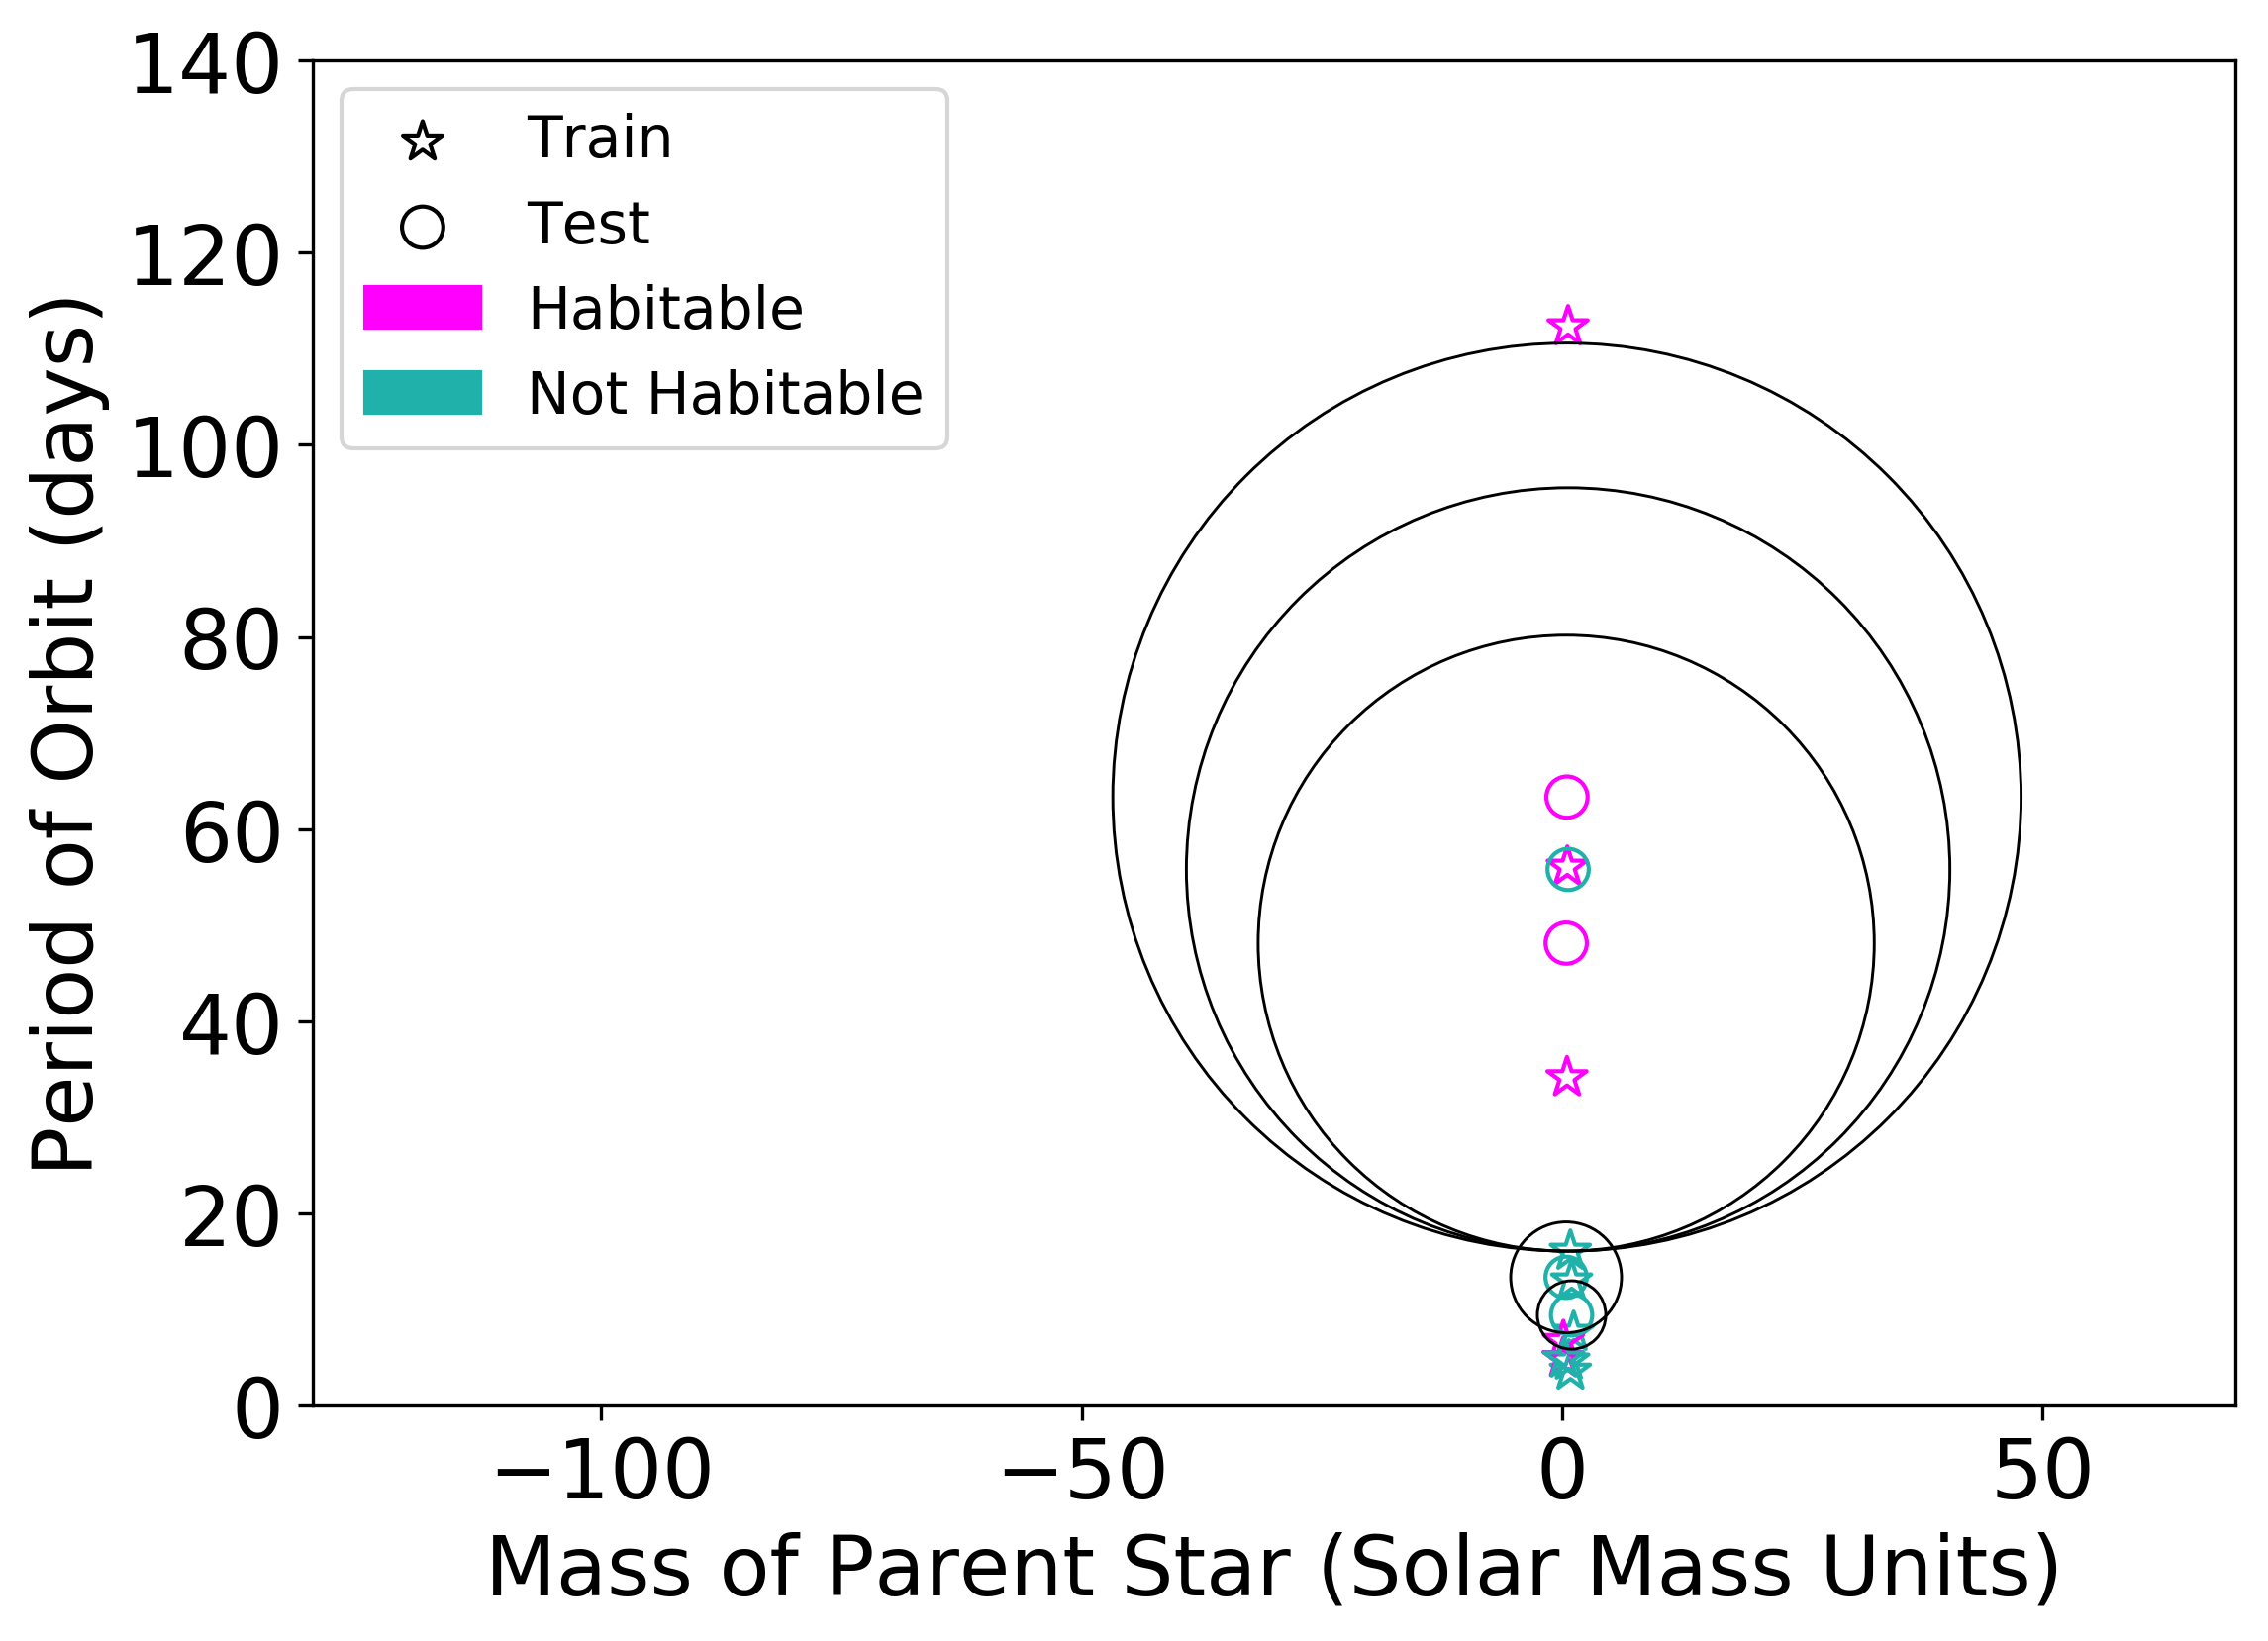

In [17]:
plt.figure(figsize=(10,6))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
a = plt.scatter(TrainSet['S_MASS'], TrainSet['P_PERIOD'], marker = '*',facecolor = 'none',\
            c = TrainSet['P_HABITABLE'], s = 100, label = 'Train', cmap=cmap) 

a.set_facecolor('none')

a = plt.scatter(TestSet['S_MASS'], TestSet['P_PERIOD'], marker = 'o',facecolors = 'none',\
            c = TestSet['P_HABITABLE'], s = 100, label = 'Test', cmap=cmap) 

a.set_facecolor('none')

for i in range(len(TestSet)): #plot neighbors

    circle1=plt.Circle((TestSet['S_MASS'].iloc[i],TestSet['P_PERIOD'].iloc[i]),model.kneighbors(Xtest.iloc[:,:2])[0][i,2],\
                       lw = 0.7, edgecolor='k',facecolor='none')
    plt.gca().add_artist(circle1)
    
plt.gca().set_aspect(1)

bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')
magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
leg.legendHandles[0].set_facecolor('none')
leg.legendHandles[1].set_color('k')
leg.legendHandles[1].set_facecolor('none')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], magentapatch, bluepatch],\
           loc = 'upper left', fontsize = 14)

plt.xlim(-130,70)
plt.ylim(0,140)
plt.xlabel('Mass of Parent Star (Solar Mass Units)')
plt.ylabel('Period of Orbit (days)');

#plt.savefig('HabPlanetsKNN2features.png', dpi = 300)

### Do you notice any issue here?

### If one dimension has a much bigger range than others, it will dominate the decision process. This issue can be solved by <b>scaling</b>. Scaling is a very important pre-processing step for most ML algorithms.

See some examples of different scaling algorithms [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

We will go with RobustScaler, which is more resistant to outliers than the standard version.


In [15]:
scaler = sklearn.preprocessing.RobustScaler()

In [16]:
scaler.fit(Xtrain) # important: we only scale the train set.

RobustScaler()

In [17]:
scaledXTrain = scaler.transform(Xtrain)

In [18]:
scaledXTrain

array([[ 0.47222222, -0.18360363, -0.33840183],
       [ 0.44444444,  0.06038761,  0.05671512],
       [ 1.38888889, -0.10467304, -0.14339694],
       [-0.22222222,  1.94175736,  1.60417741],
       [ 0.80555556,  0.        ,  0.        ],
       [-1.66666667, -0.15801948, -0.43679409],
       [ 0.        , -0.16299717, -0.31519247],
       [-1.58333333, -0.12323674, -0.38472405],
       [ 1.19444444, 21.311672  , 11.01745224],
       [ 0.33333333,  3.04655169,  2.38937206],
       [-0.52777778,  0.41352236,  0.3761471 ],
       [-0.44444444,  0.84198052,  0.66159817],
       [-1.41666667, -0.15877753, -0.40201197]])

In [19]:
scaledXtest = scaler.transform(Xtest) # note that these are now numpy arrays, not data frames

In [ ]:
scaler.inverse_transform #This unscales

In [20]:
model.fit(scaledXTrain[:,:2],ytrain).predict(scaledXtest[:,:2])

array([1, 0, 1, 0, 1])

In [21]:
model.kneighbors(scaledXtest[:,:2]) #The distances of neighbors for test set objects look more balanced

(array([[0.2500478 , 0.53900086, 1.00570768],
        [0.47721081, 0.66005572, 0.79614695],
        [0.16494121, 0.57079985, 1.00501058],
        [0.06956397, 0.35230123, 0.38378203],
        [0.34256727, 0.35245873, 1.07701084]]),
 array([[11, 10,  1],
        [10, 12,  6],
        [11, 10,  3],
        [ 4,  0,  1],
        [11, 10, 12]]))

In [26]:
plt.figure(figsize=(10,6))#, aspect_ratio = 'equal')
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#20B2AA','#FF00FF'])
plt.scatter(scaledXTrain[:,0], scaledXTrain[:,1], marker = '*',\
            c = ytrain, s = 100, label = 'Train', cmap=cmap) #, 

plt.scatter(scaledXtest[:,0], scaledXtest[:,1], marker = 'o',\
            c = ytest, s = 100, label = 'Test', cmap=cmap) #label = ,

for i in range(len(TestSet)):

    circle1=plt.Circle((scaledXtest[i,0],scaledXtest[i,1]),model.kneighbors(scaledXtest[:,:2])[0][i,2],\
                       edgecolor='k',facecolor='none', lw = 0.7)
    plt.gca().add_artist(circle1)

plt.gca().set_aspect(1)

plt.legend();

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('k')
#leg.legendHandles[0].set_facecolor('none')
leg.legendHandles[1].set_color('k')
#leg.legendHandles[1].set_facecolor('none')


plt.legend(handles=[leg.legendHandles[0],leg.legendHandles[1], 
           loc = 'upper right', fontsize = 14)

plt.xlabel('Mass of Parent Star (Earth Mass Units)')
plt.ylabel('Period of Orbit (days)');


plt.xlim(-2.5,2.5)
plt.ylim(-1.,2.5);

#plt.savefig('HabPlanetsKNNscaled.png', dpi = 300)

SyntaxError: invalid syntax (<ipython-input-26-3c344fafe6af>, line 28)

### Note: for the purpose of application (not visualization), we should use all three features.

### Final remarks:
    
kNN needs scaling! Does DT have the same issue?

Any thoughts on strengths/weaknesses?